In [22]:
import gym
import numpy as np
import time

In [23]:
env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

In [24]:
Q = np.zeros((STATES, ACTIONS))     # create a matrix with all 0 values
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [25]:
# Constants
EPISODES = 10000    # how many times to run the enviroment from the beginning
MAX_STEPS = 100     # max number of steps allowed for each run of enviroment

LEARNING_RATE = 0.81
GAMMA = 0.96

In [26]:
# Picking an action
epsilon = 0.9   # start with a 90% chance of picking a random action

# code to pick action
if np.random.uniform(0, 1) < epsilon:   # checking if a randomly selected value is less than epsilon
    action = env.action_space.sample()  # take random action
else:
    action = np.argmax(Q[state, :])     # use Q table to pick best action based on current values

In [27]:
# Formula for updating Q values
# Q[state, action] = Q[state, action] + LEARNING_RATE*(reward + GAMMA * np.max(Q[new_state, :]) - Q[state, action])

In [28]:
RENDER = False  # If you want to see the training

In [29]:
rewards = []
for episode in range(EPISODES):
    state = env.reset()
    for _ in range(MAX_STEPS):

        if RENDER:
            env.render()
        
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])

        next_state, reward, done, _ = env.step(action)

        Q[state, action] = Q[state, action] + LEARNING_RATE*(reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

        state = next_state

        if done:
            rewards.append(reward)
            epsilon -= 0.001
            break # goal reached

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")

[[7.29971800e-03 1.83499011e-01 7.22790352e-03 7.42460195e-03]
 [2.06034722e-03 6.83723450e-04 2.90246761e-03 1.25350746e-01]
 [1.43802325e-03 1.48646128e-03 1.67236012e-03 8.56007211e-02]
 [4.02778323e-04 5.12229585e-04 3.53121784e-04 4.13419385e-02]
 [3.88749704e-01 2.49951440e-03 5.68676819e-03 4.33562135e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.03022116e-08 3.25421817e-08 4.97500393e-02 6.36170996e-08]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.31601055e-03 3.97549557e-03 2.98517463e-03 7.08530819e-01]
 [1.60515276e-03 8.48664305e-01 8.86595704e-04 7.31083488e-04]
 [1.84869719e-01 3.05069924e-05 7.20056629e-05 2.31885771e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.84716976e-03 1.00373714e-02 9.42189743e-01 5.82048163e-03]
 [6.24873937e-02 9.92520592e-01 4.14106110e-02 3.57473136e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

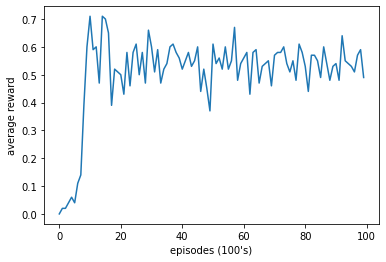

In [30]:
# Plotting the training process
import matplotlib.pyplot as plt

def get_average(values):
    return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):                   # 100 is our MAX_STEPS
    avg_rewards.append(get_average(rewards[i:i+100]))   # shows improvement for every step our agent has taken

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()